In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.image import imread
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, auc, plot_roc_curve,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve,roc_auc_score, balanced_accuracy_score,classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.metrics import plot_confusion_matrix
import pickle

pd.set_option('display.max_columns', 500)
sns.set()

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [6]:
train,test = train_test_split(df,test_size=0.2,random_state=123)

In [7]:
#A1
train.reset_index(drop=True,inplace=True)
#A1
test.reset_index(drop=True,inplace=True)

In [8]:
#A7
X_train = train.drop(['class'],axis=1)
y_train = train['class']

In [9]:
train.shape

(416, 17)

In [10]:
X_train.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [11]:
cat1 = []
for i in X_train.columns:
    if X_train[i].dtype == 'O':
        cat1.append(i)

In [12]:
#6
encoder =  OneHotEncoder(drop='first',dtype=int)
enc_data =pd.DataFrame(encoder.fit_transform(X_train[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]).toarray())
#enc_data.columns = encoder.get_feature_names_out()
enc_data.columns = encoder.get_feature_names(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'])
X_train = X_train.join(enc_data)

X_train.drop(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],axis=1,inplace=True)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
'''#A8
encoder =  OneHotEncoder(drop='first',dtype=int)
enc_data =pd.DataFrame(encoder.fit_transform(X_train[cat1]).toarray())
#enc_data.columns = encoder.get_feature_names_out()
enc_data.columns = encoder.get_feature_names(cat1)
X_train = X_train.join(enc_data)

X_train.drop(cat1,axis=1,inplace=True)
X_train.reset_index(drop = True,inplace=True)'''

"#A8\nencoder =  OneHotEncoder(drop='first',dtype=int)\nenc_data =pd.DataFrame(encoder.fit_transform(X_train[cat1]).toarray())\n#enc_data.columns = encoder.get_feature_names_out()\nenc_data.columns = encoder.get_feature_names(cat1)\nX_train = X_train.join(enc_data)\n\nX_train.drop(cat1,axis=1,inplace=True)\nX_train.reset_index(drop = True,inplace=True)"

In [14]:
'''#from sklearn.preprocessing import LabelEncoder

#label_encoder = LabelEncoder()  # Create an instance of the LabelEncoder

# Fit and transform the 'X_train' column using the label encoder
#X_train['Age'] = label_encoder.fit_transform(X_train['Age'])
X_train['Gender'] = X_train['Gender'].map({'Male': 1, 'Female': 0})
X_train['Polyuria'] = X_train['Polyuria'].map({'Yes': 1, 'No': 0})
X_train['Polydipsia'] = X_train['Polydipsia'].map({'Yes': 1, 'No': 0})
X_train['sudden weight loss'] = X_train['sudden weight loss'].map({'Yes': 1, 'No': 0})
X_train['weakness'] = X_train['weakness'].map({'Yes': 1, 'No': 0})
X_train['Polyphagia'] = X_train['Polyphagia'].map({'Yes': 1, 'No': 0})
X_train['Genital thrush'] = X_train['Genital thrush'].map({'Yes': 1, 'No': 0})
X_train['visual blurring'] = X_train['visual blurring'].map({'Yes': 1, 'No': 0})
X_train['Itching'] = X_train['Itching'].map({'Yes': 1, 'No': 0})
X_train['Irritability'] = X_train['Irritability'].map({'Yes': 1, 'No': 0})
X_train['delayed healing'] = X_train['delayed healing'].map({'Yes': 1, 'No': 0})
X_train['partial paresis'] = X_train['partial paresis'].map({'Yes': 1, 'No': 0})
X_train['muscle stiffness'] = X_train['muscle stiffness'].map({'Yes': 1, 'No': 0})
X_train['Alopecia'] = X_train['Alopecia'].map({'Yes': 1, 'No': 0})
X_train['Obesity'] = X_train['Obesity'].map({'Yes': 1, 'No': 0})
'''

"#from sklearn.preprocessing import LabelEncoder\n\n#label_encoder = LabelEncoder()  # Create an instance of the LabelEncoder\n\n# Fit and transform the 'X_train' column using the label encoder\n#X_train['Age'] = label_encoder.fit_transform(X_train['Age'])\nX_train['Gender'] = X_train['Gender'].map({'Male': 1, 'Female': 0})\nX_train['Polyuria'] = X_train['Polyuria'].map({'Yes': 1, 'No': 0})\nX_train['Polydipsia'] = X_train['Polydipsia'].map({'Yes': 1, 'No': 0})\nX_train['sudden weight loss'] = X_train['sudden weight loss'].map({'Yes': 1, 'No': 0})\nX_train['weakness'] = X_train['weakness'].map({'Yes': 1, 'No': 0})\nX_train['Polyphagia'] = X_train['Polyphagia'].map({'Yes': 1, 'No': 0})\nX_train['Genital thrush'] = X_train['Genital thrush'].map({'Yes': 1, 'No': 0})\nX_train['visual blurring'] = X_train['visual blurring'].map({'Yes': 1, 'No': 0})\nX_train['Itching'] = X_train['Itching'].map({'Yes': 1, 'No': 0})\nX_train['Irritability'] = X_train['Irritability'].map({'Yes': 1, 'No': 0})\nX

In [15]:
col1 = X_train.columns

In [16]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


<AxesSubplot:>

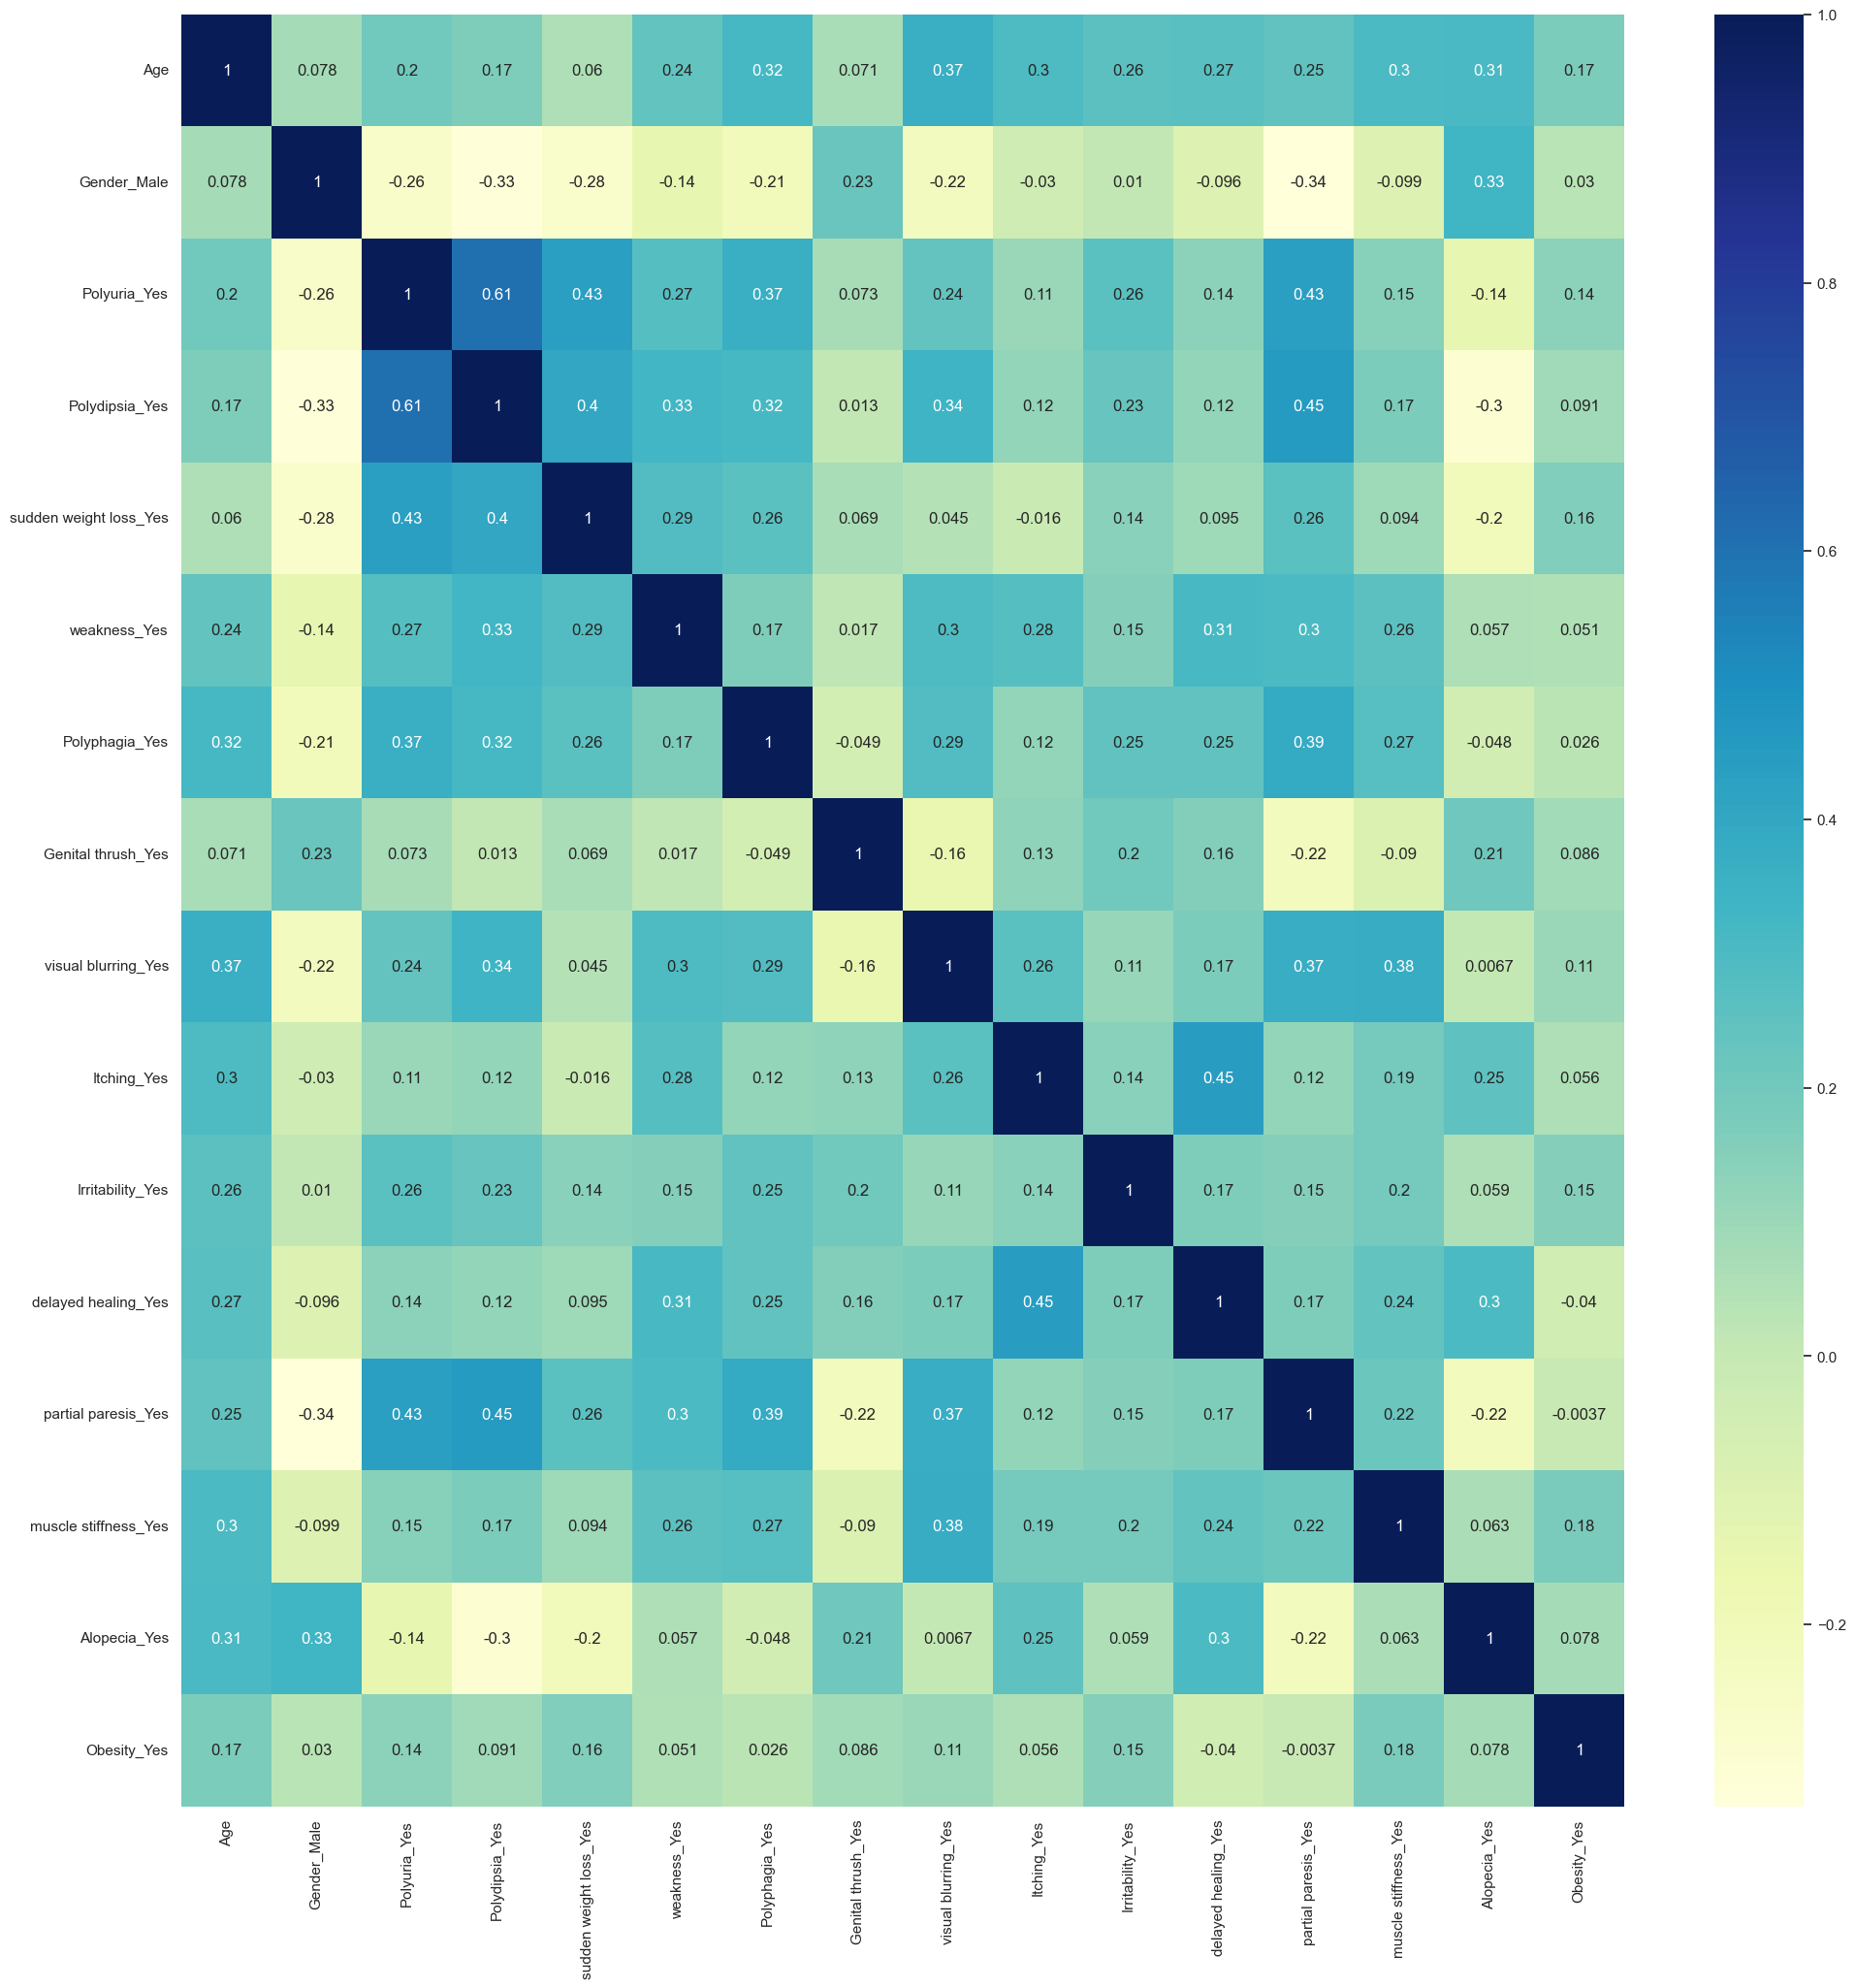

In [17]:
plt.figure(figsize =(24,24))
cors = X_train.corr()
sns.heatmap(cors,annot=True,cmap='YlGnBu')

In [18]:
cols = X_train.columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = cols)

In [19]:
dt = DecisionTreeClassifier(max_depth= 10)
dt.fit(X_train,y_train)
predictors = col1

coef = pd.Series(dt.feature_importances_, predictors).sort_values(ascending=False)
coef.to_frame()

,0
Polyuria_Yes,0.435911
Gender_Male,0.115024
Polydipsia_Yes,0.093380
Alopecia_Yes,0.070809
delayed healing_Yes,0.066492
Age,0.057786
Irritability_Yes,0.039150
Obesity_Yes,0.028521
muscle stiffness_Yes,0.028410
visual blurring_Yes,0.026892


In [20]:
X_train.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,0.459459,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0.364865,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.432432,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.459459,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.270270,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
def prepare(df):
    
    X_test = df.drop(['class'],axis=1)
    y_test = df['class']
    


# Transform the 'X_test' column using the label encoder
    #X_test['Age'] = label_encoder.fit_transform(X_test['Age'])
    '''X_test['Gender'] = X_test['Gender'].map({'Male': 1, 'Female': 0})
    X_test['Polyuria'] = X_test['Polyuria'].map({'Yes': 1, 'No': 0})
    X_test['Polydipsia'] = X_test['Polydipsia'].map({'Yes': 1, 'No': 0})
    X_test['sudden weight loss'] = X_test['sudden weight loss'].map({'Yes': 1, 'No': 0})
    X_test['weakness'] = X_test['weakness'].map({'Yes': 1, 'No': 0})
    X_test['Polyphagia'] = X_test['Polyphagia'].map({'Yes': 1, 'No': 0})
    X_test['Genital thrush'] = X_test['Genital thrush'].map({'Yes': 1, 'No': 0})
    X_test['visual blurring'] = X_test['visual blurring'].map({'Yes': 1, 'No': 0})
    X_test['Itching'] = X_test['Itching'].map({'Yes': 1, 'No': 0})
    X_test['Irritability'] = X_test['Irritability'].map({'Yes': 1, 'No': 0})
    X_test['delayed healing'] = X_test['delayed healing'].map({'Yes': 1, 'No': 0})
    X_test['partial paresis'] = X_test['partial paresis'].map({'Yes': 1, 'No': 0})
    X_test['muscle stiffness'] = X_test['muscle stiffness'].map({'Yes': 1, 'No': 0})
    X_test['Alopecia'] = X_test['Alopecia'].map({'Yes': 1, 'No': 0})
    X_test['Obesity'] = X_test['Obesity'].map({'Yes': 1, 'No': 0})'''

    #6
    #encoder =  OneHotEncoder(drop='first',dtype=int)
    enc_data =pd.DataFrame(encoder.transform(X_test[['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
           'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
           'Itching', 'Irritability', 'delayed healing', 'partial paresis',
           'muscle stiffness', 'Alopecia', 'Obesity']]).toarray())
    #enc_data.columns = encoder.get_feature_names_out()
    enc_data.columns = encoder.get_feature_names(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
           'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
           'Itching', 'Irritability', 'delayed healing', 'partial paresis',
           'muscle stiffness', 'Alopecia', 'Obesity'])
    X_test = X_test.join(enc_data)

    X_test.drop(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
           'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
           'Itching', 'Irritability', 'delayed healing', 'partial paresis',
           'muscle stiffness', 'Alopecia', 'Obesity'],axis=1,inplace=True)
    cols = X_test.columns
    #scaler =  MinMaxScaler()
    X_test = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test,columns=cols)
    
    X_test.reset_index(drop=True,inplace=True)
    return X_test, y_test
    

In [22]:
X_test,y_test=prepare(test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
X_test.head()

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes
0,0.297297,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
1,0.418919,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.324324,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.594595,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.500000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [24]:
def model_to_use(input_ml_algo):
    if input_ml_algo == 'DT':
        model = DecisionTreeClassifier()
    elif input_ml_algo == 'RF':
        model = RandomForestClassifier()
    elif input_ml_algo == 'XGBC':
        model = XGBClassifier()
    elif input_ml_algo == 'LGBMC':
        model = LGBMClassifier()
    elif input_ml_algo=='LR':
        model=LogisticRegression()
    elif input_ml_algo=='KNN':
        model=KNeighborsClassifier()
    return model

In [25]:
def performance(model,X_train,y_train,X_test, y_test):
    y_pred = model.predict(X_test)

    # Predict probability for test dataset
    y_pred_prob = model.predict_proba(X_test)
    y_pred_prob = [x[1] for x in y_pred_prob]

    disp = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test, 
    cmap='Blues', values_format='d',
    display_labels=['No','Yes'])

    print("\n Accuracy Score : \n ",accuracy_score(y_test,y_pred))
    print("\n AUC Score : \n", roc_auc_score(y_test, y_pred_prob))
    print("\n Confusion Matrix : \n ",confusion_matrix(y_test, y_pred))
    print("\n Classification Report : \n",classification_report(y_test, y_pred))

    print("\n ROC curve : \n")
    sns.set_style("white")
    plot_roc_curve(model, X_test, y_test)
    plt.show()


 Accuracy Score : 
  0.9423076923076923

 AUC Score : 
 0.9768740031897926

 Confusion Matrix : 
  [[36  2]
 [ 4 62]]

 Classification Report : 
               precision    recall  f1-score   support

    Negative       0.90      0.95      0.92        38
    Positive       0.97      0.94      0.95        66

    accuracy                           0.94       104
   macro avg       0.93      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104


 ROC curve : 



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


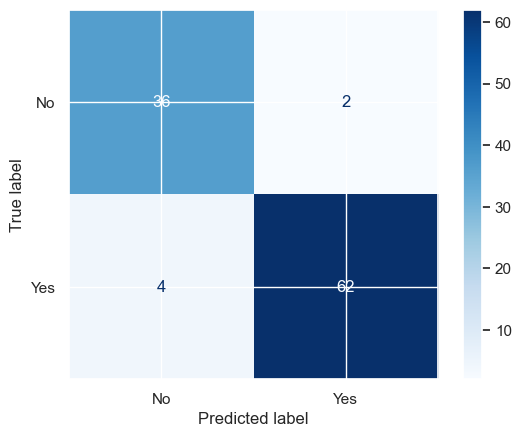

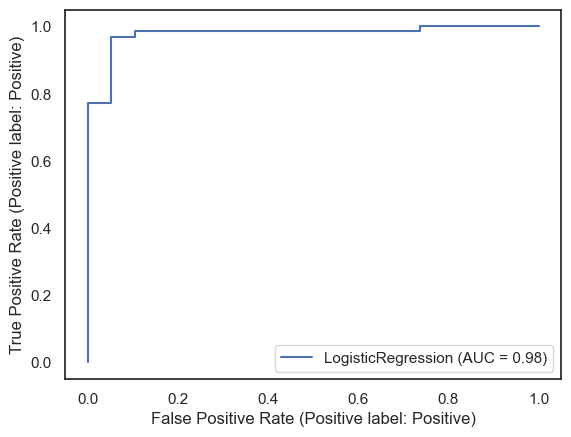

In [26]:
model1 = model_to_use('LR')
model1.fit(X_train,y_train)
performance(model1,X_train,y_train,X_test,y_test)
#plot_confusion_matrix(model1, X_test, y_test)

In [27]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
ros = RandomOverSampler()
X_ros,y_ros  = ros.fit_resample(X_train,y_train)


 Accuracy Score : 
  0.9423076923076923

 AUC Score : 
 0.9768740031897926

 Confusion Matrix : 
  [[36  2]
 [ 4 62]]

 Classification Report : 
               precision    recall  f1-score   support

    Negative       0.90      0.95      0.92        38
    Positive       0.97      0.94      0.95        66

    accuracy                           0.94       104
   macro avg       0.93      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104


 ROC curve : 



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


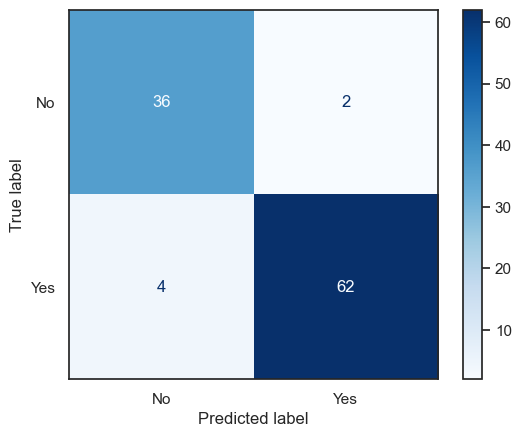

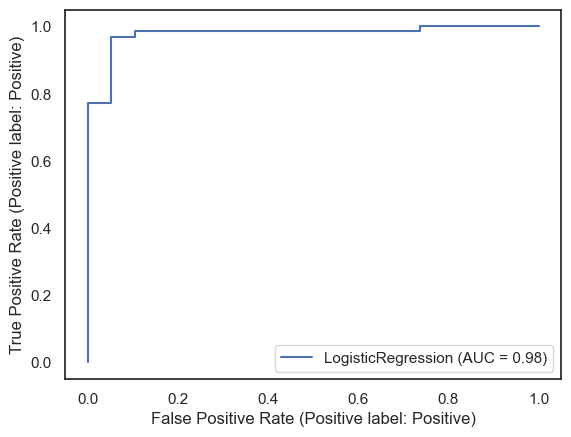

In [29]:
model1 = model_to_use('LR')
model1.fit(X_train,y_train)
performance(model1,X_ros,y_ros,X_test,y_test)
#plot_confusion_matrix(model1, X_test, y_test)


 Accuracy Score : 
  0.9230769230769231

 AUC Score : 
 0.9114832535885168

 Confusion Matrix : 
  [[33  5]
 [ 3 63]]

 Classification Report : 
               precision    recall  f1-score   support

    Negative       0.92      0.87      0.89        38
    Positive       0.93      0.95      0.94        66

    accuracy                           0.92       104
   macro avg       0.92      0.91      0.92       104
weighted avg       0.92      0.92      0.92       104


 ROC curve : 



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


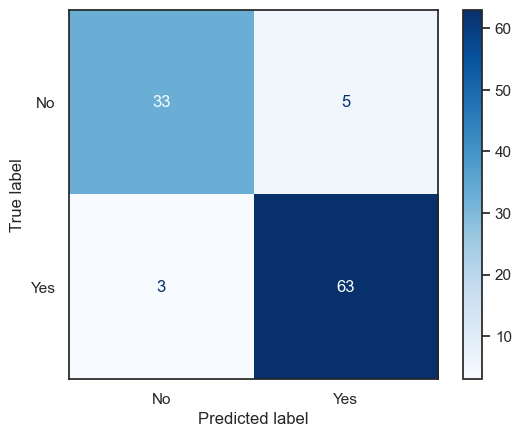

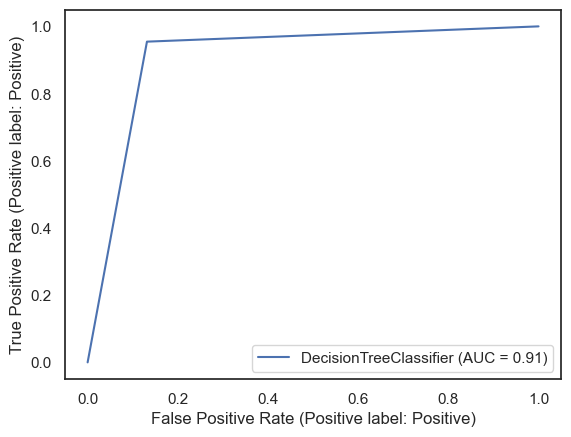

In [30]:
model3 = model_to_use('DT')
model3.fit(X_train,y_train)
performance(model3,X_ros,y_ros,X_test,y_test)
#plot_confusion_matrix(model1, X_test, y_test)


 Accuracy Score : 
  1.0

 AUC Score : 
 1.0

 Confusion Matrix : 
  [[38  0]
 [ 0 66]]

 Classification Report : 
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        38
    Positive       1.00      1.00      1.00        66

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104


 ROC curve : 



C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


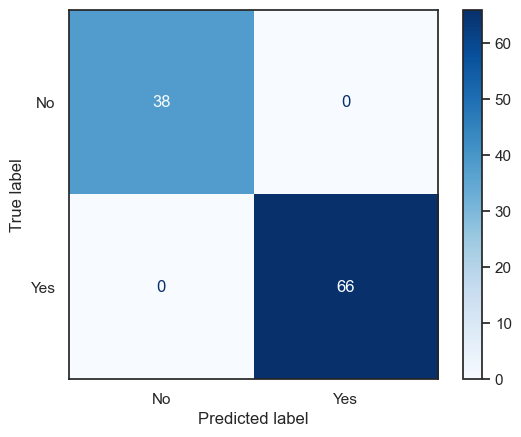

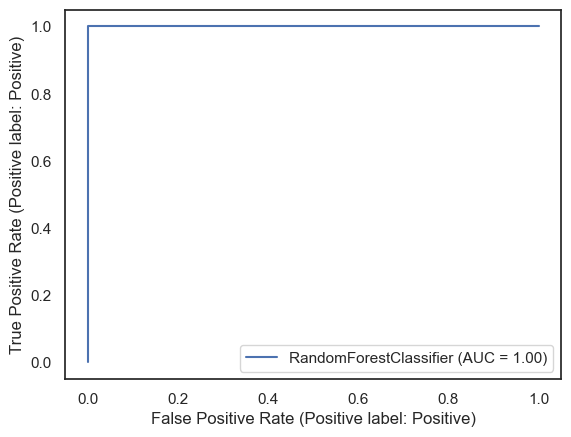

In [31]:
model4 = model_to_use('RF')
model4.fit(X_train,y_train)
performance(model4,X_ros,y_ros,X_test,y_test)
#plot_confusion_matrix(model1, X_test, y_test)

In [33]:
#import pickle
from pickle import dump
#save the model
dump(model4, open('RF_class_model.pkl','wb'))

dump(scaler, open('scal.pkl','wb'))

dump(encoder, open('enc.pkl','wb'))



In [ ]:
'''%%writefile diabetes.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle

model = pickle.load(open('RF_class_model.pkl','rb'))
scaler = pickle.load(open('scal_class.pkl', 'rb'))
encoder = pickle.load(open ('enc_class.pkl', "rb"))



#if(not df):
   # st.info('The prediction will begin, once you upload your data set')
   # st.stop()
    
st.title('DIABETES PREDICTION')
    
def predict():
    c1,c2 = st.columns(2)
    with(c1):
        Age = st.number_input('Age')
        Gender = st.select_box('Gender',['female','male'])
        Polyuria = st.select_box('Polyuria'['No','Yes'])
        Polydipsia = st.select_box('Polydipsia'['No','Yes'])
        sudden_weight_loss = st.select_box('sudden weight loss'['No','Yes'])
        weakness = st.select_box('weakness'['No','Yes'])
        Polyphagia = st.select_box('Polyphagia'['No','Yes'])
        Genital_thrush = st.select_box('Genital thrush'['No','Yes'])
        
    with(c2):
        visual_blurring = st.select_box('visual blurring'['No','Yes'])
        Itching = st.select_box('Itching'['No','Yes'])
        Irritability = st.select_box('Irritability'['No','Yes'])
        delayed_healing = st.select_box('delayed healing'['No','Yes'])
        partial_paresis = st.select_box('partial paresis'['No','Yes'])
        muscle_stiffness = st.select_box('muscle stiffness'['No','Yes'])
        Alopecia = st.select_box('Alopecia'['No','Yes'])
        Obesity = st.select_box('Obesity'['No','Yes'])
        
        feat = np.array([Age Gender, Polyuria, Polydipsia, sudden_weight_loss,
        weakness, Polyphagia, Genital_thrush, visual_blurring,
        Itching, Irritability, delayed_healing, partial_paresis,
        muscle_stiffness, Alopecia, Obesity]).reshape(1,-1)
        cols = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']
        feat1 = pd.DataFrame(feat, columns=cols)
        
        return feat1
        
        


frame = predict()
def prepare(d):
    enc_data =pd.DataFrame(encoder.transform(d[['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity']]).toarray())
    enc_data.columns = encoder.get_feature_names(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'])
    d = d.join(enc_data)
    #X_test.drop(['City','Day','Room Type','Shared Room','Private Room','Superhost'],axis=1,inplace=True)
    col2 = d.columns
    d = scaler.fit_transform(d)
    d = pd.DataFrame(X_d,columns=col2)
    
    return d
if st.button('predict'):
    frame2= prepare(frame)
    pred = model.predict(frame2)
    st.write(pred[0])
    '''

In [ ]:
print(df.columns)

In [ ]:
X_train.head(2)

In [ ]:
df.shape

In [ ]:
df['class'].value_counts()